In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import requests

C:\Users\PA\AppData\Local\Temp\ipykernel_664\1386880744.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# load data
data_session = pd.read_csv('../session_planning_with_loc_v2.csv')

In [6]:
data_session = data_session.drop(["Unnamed: 0.1", "Unnamed: 0"], axis=1)

In [7]:
data_session.head(1)

,num_jour,date,discipline,num_session,debut_epreuve,fin_epreuve,lieu_epreuve,nom_epreuve,NOM,Geo Point,SITES OLYMPIQUES PARALYMPIQUES,SPORTS,latitude,longitude
0,6,Jeudi 1 Août,ATHLETISME,ATH02,10:00,13:00,Stade de France,"Décathlon - 100 m, hommes Lancer de marteau - ...",Stade de France,"48.924388, 2.359871","Site olympique,Site paralympique","Athlétisme,Para athlétisme,Rugby",48.924388,2.359871


In [8]:
data_session.lieu_epreuve.unique()

array(['Stade de France',
       'Stade nautique de Vaires-sur-Marne - Bassin eaux calmes',
       'Arena Porte de La Chapelle',
       'Stade BMX de Saint-Quentin-en-Yvelines',
       'Stade nautique de Vaires-sur-Marne - Bassin eaux vives',
       'Vélodrome National de Saint-Quentin-en-Yvelines', 'Grand Palais',
       'Parc des Princes', 'Arena Bercy', 'Porte de La Chapelle Arena',
       'Arena Paris Sud 6', 'Stade Yves-du-Manoir - Terrain 2',
       'Stade Yves-du-Manoir - Terrain 1', 'Arena Champ-de-Mars',
       'Paris La Défense Arena', 'Arena Paris Nord',
       'Château de Versailles', 'Centre aquatique', 'Invalides',
       'Stade Tour Eiffel'], dtype=object)

In [9]:
stade_vers_capacite = {
    'Stade de France': 80000,
    'Stade nautique de Vaires-sur-Marne - Bassin eaux calmes': 14000,
    'Arena Porte de La Chapelle': 9000,
    'Stade BMX de Saint-Quentin-en-Yvelines': 3000,
    'Stade nautique de Vaires-sur-Marne - Bassin eaux vives': 24000,
    'Vélodrome National de Saint-Quentin-en-Yvelines': 6000,
    'Grand Palais': 8000,
    'Parc des Princes'   : 48583,
    'Arena Bercy': 20300,
    'Porte de La Chapelle Arena': 9000,
    'Arena Paris Sud 6': 8000,
    'Stade Yves-du-Manoir - Terrain 2': 13500,
    'Stade Yves-du-Manoir - Terrain 1': 13500,
    'Arena Champ-de-Mars': 8000,
    'Paris La Défense Arena': 17000,
    'Arena Paris Nord': 8000,
    'Château de Versailles': 40000,
    'Centre aquatique': 2500,
    'Invalides': 17000,
    'Stade Tour Eiffel': 12860
}

In [14]:
for stade in tqdm(stade_vers_capacite.keys()):
    data_session.loc[data_session.lieu_epreuve == stade, 'capacite'] = stade_vers_capacite[stade]

100%|██████████| 20/20 [00:00<00:00, 59.88it/s]


In [15]:
data_session

,num_jour,date,discipline,num_session,debut_epreuve,fin_epreuve,lieu_epreuve,nom_epreuve,NOM,Geo Point,SITES OLYMPIQUES PARALYMPIQUES,SPORTS,latitude,longitude,capacite
0,6,Jeudi 1 Août,ATHLETISME,ATH02,10:00,13:00,Stade de France,"Décathlon - 100 m, hommes Lancer de marteau - ...",Stade de France,"48.924388, 2.359871","Site olympique,Site paralympique","Athlétisme,Para athlétisme,Rugby",48.924388,2.359871,80000.0
1,6,Jeudi 1 Août,ATHLETISME,ATH02,17:40,22:00,Stade de France,"Décathlon - saut en hauteur, hommes 5 000 m - ...",Stade de France,"48.924388, 2.359871","Site olympique,Site paralympique","Athlétisme,Para athlétisme,Rugby",48.924388,2.359871,80000.0
2,6,Jeudi 1 Août,ATHLETISME,ATH04,10:00,16:00,Stade de France,"Décathlon - 110 m haies, hommes Saut à la perc...",Stade de France,"48.924388, 2.359871","Site olympique,Site paralympique","Athlétisme,Para athlétisme,Rugby",48.924388,2.359871,80000.0
3,6,Jeudi 1 Août,ATHLETISME,ATH04,19:00,22:00,Stade de France,"1 500 m - hommes, Repêchages Lancer de poids -...",Stade de France,"48.924388, 2.359871","Site olympique,Site paralympique","Athlétisme,Para athlétisme,Rugby",48.924388,2.359871,80000.0
4,6,Jeudi 1 Août,ATHLETISME,ATH06,10:00,13:15,Stade de France,"3 000 m steeple - femmes, 1er tour Lancer de m...",Stade de France,"48.924388, 2.359871","Site olympique,Site paralympique","Athlétisme,Para athlétisme,Rugby",48.924388,2.359871,80000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,1,Samedi 27 Juillet,WATER POLO,WPO31,18:00,21:00,Paris La Défense Arena,"Hommes, match de classement Hommes, demi-finale",La Défense Arena,"48.89566, 2.22971","Site olympique,Site paralympique","Natation,Para natation,Water-polo",48.895660,2.229710,17000.0
445,1,Samedi 27 Juillet,WATER POLO,WPO31,09:00,12:00,Paris La Défense Arena,"Femmes, match de classement Femmes, match pour...",La Défense Arena,"48.89566, 2.22971","Site olympique,Site paralympique","Natation,Para natation,Water-polo",48.895660,2.229710,17000.0
446,1,Samedi 27 Juillet,WATER POLO,WPO31,14:00,21:00,Paris La Défense Arena,"Femmes, match de classement Femmes, match pour...",La Défense Arena,"48.89566, 2.22971","Site olympique,Site paralympique","Natation,Para natation,Water-polo",48.895660,2.229710,17000.0
447,1,Samedi 27 Juillet,WATER POLO,WPO35,09:00,12:00,Paris La Défense Arena,"Hommes, match de classement Hommes, match pour...",La Défense Arena,"48.89566, 2.22971","Site olympique,Site paralympique","Natation,Para natation,Water-polo",48.895660,2.229710,17000.0


<Axes: >

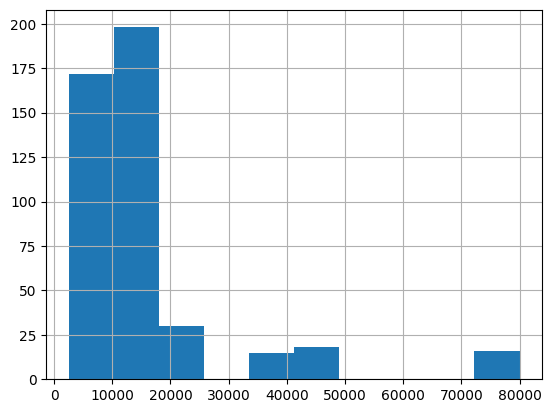

In [18]:
data_session.capacite.hist()

In [20]:
data_session.to_csv('../session_planning_with_loc_v3.csv', index=False)